
<b> ИССЛЕДОВАНИЕ ЗАКОНОМЕРНОСТЕЙ УСПЕШНОСТИ ИГР. ВЫЯВЛЕНИЕ ПОТЕНЦИАЛЬНО ПОПУЛЯРНОГО ПРОДУКТА.<b/>
    
    


Магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Данные**

Файл с данными *(games.csv)* о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Задача**

   Необходимо:
1. Подготовить данные
2. Провести исследовательский анализ данных
3. Составить портрет пользователя каждого региона
4. Проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Описание данных**

*Name* — название игры

*Platform* — платформа

*Year_of_Release* — год выпуска

*Genre* — жанр игры

*NA_sales* — продажи в Северной Америке (миллионы проданных копий)

*EU_sales* — продажи в Европе (миллионы проданных копий)

*JP_sales* — продажи в Японии (миллионы проданных копий)

*Other_sales* — продажи в других странах (миллионы проданных копий)

*Critic_Score* — оценка критиков (максимум 100)

*User_Score* — оценка пользователей (максимум 10)

*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация о данных

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
games = pd.read_csv("/datasets/games.csv", sep=",")

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица с исходными данными состоит из 11 столбцов/16715 строк. Сразу видим "поле работ":

- названия столбцов приведем к единому регистру, 
- типы данных некоторых столбцов не соответствуют значениям, 
- также есть пропуски, которые требуют обработки.

## Предобработка данных

### Замена названия столбцов

Приведем названия столбцов к единообразию - нижнему регистру

In [5]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена типов данных

Заменим тип данных в столбце с годом релиза на целочисленный, так как год обычно пишется целым числом =)

In [6]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [7]:
games['year_of_release'].dtype

Int64Dtype()

В остальных столбцах (пока) не вижу смысла заменять тип данных, посмотрим дальше

### Обработка пропусков
Пропуски посмотрим по каждому столбцу в отдельности

#### Столбец "name"
**Название игры**

In [8]:
games['name'].isna().sum()

2

In [9]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Имеем две строки с пропусками в названии игры, попробуем разобраться по платформе и году релиза

In [10]:
games.query('platform=="GEN" and year_of_release==1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Разобраться не получилось, пропусков в других столбцах тоже немало =) Удалим эти две строки без зазрения совести, поскольку 2 против ~17К строк ничтожно мало

In [11]:
games.dropna(subset=['name'], inplace=True)
len(games)

16713

#### Столбец "platform"
**Платформа**

In [12]:
games['platform'].isna().sum()

0

Пропусков нет, проверим корректны ли данные

In [13]:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Со столбцом все ок, идем дальше

#### Столбец "year_of_release"
**Год выпуска**

In [14]:
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Посмотрим пропуски

In [15]:
games['year_of_release'].isna().sum()

269

In [16]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
print('Процент пропущенных значений с годом релиза = ',games['year_of_release'].isna().sum()*100/len(games)) 

Процент пропущенных значений с годом релиза =  1.6095255190570215


Совсем мало (1,6%), отбросим их

In [18]:
games = games.dropna(subset=['year_of_release'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


#### Столбец "genre"
**Жанр игры**

In [19]:
games['genre'].isna().sum()

0

In [20]:
games['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Столбец-молодец, двигаемся дальше =)

#### Столбец "na_sales"
**Продажи в Северной Америке (миллионы проданных копий)**

In [21]:
games['na_sales'].isna().sum()

0

In [22]:
games['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Столбец корректен, пропусков нет

#### Столбец "eu_sales"
**Продажи в Европе (миллионы проданных копий)**

In [23]:
games['eu_sales'].isna().sum()

0

In [24]:
games['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

В Европе продажи считают также все =)

#### Столбец "jp_sales"
**Продажи в Японии (миллионы проданных копий)**

In [25]:
games['jp_sales'].isna().sum()

0

In [26]:
games['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Со столбцом все в порядке!

#### Столбец "other_sales"
**Продажи в других странах (миллионы проданных копий)**

In [25]:
games['other_sales'].isna().sum()

0

In [26]:
games['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Отлично, все корректно

#### Столбец "critic_score"
**Оценка критиков (максимум 100)**

In [27]:
games['critic_score'].isna().sum()

8461

In [28]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков очень много, заполнить их или удалить не представлятся возможным. Для дальнейшего проведения анализа заполним их -1 и изменим тип данных на int

In [29]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['critic_score'] = games['critic_score'].astype('int')
games['critic_score'].isna().sum()

0

In [30]:
games['critic_score'].value_counts().sort_values()

 21       1
 17       1
 13       1
 29       3
 20       3
       ... 
 80     235
 75     240
 71     248
 70     252
-1     8461
Name: critic_score, Length: 82, dtype: int64

#### Столбец "user_score"
**Оценка пользователей (максимум 10)**

In [31]:
games['user_score'].isna().sum()

6605

In [32]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,NaN,NaN


In [33]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.2       2
1.3       2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Замечены интересные пропуски "tbd", [поисковик](https://fb-ru.turbopages.org/fb.ru/s/article/171345/tbd---chto-znachit-eto-sokraschenie) подсказывает, что аббревиатура 'tbd' (to be defined) означает, что данные скоро будут обнародованы. Для нас это все равно, что пропуск. 

Поэтому с помощью метода to_numeric приведем тип данных данного столбца к числовому и параллельно строки 'tbd' заменятся на NaN, которые мы по аналогии с оценкой критиков заменим на -1 

In [34]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [35]:
games['user_score'] = games['user_score'].fillna(-1)
games['user_score'].isna().sum()

0

#### Столбец "rating"
**Рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.**

In [36]:
games['rating'].isna().sum()

6676

Поскольку рейтинг в пропусках нам неизвестен, так и заполним их "unknown", и в дальнейшем при анализе сможем их учесть

In [37]:
games['rating'] = games['rating'].fillna('unknown')
games['user_score'].isna().sum()

0

### Проверка на дубликаты


In [38]:
games.duplicated().sum()

0

Дубликаты not detected 

### Суммарные продажи


Добавим в исходный датафрейм колонку, в которой будет расчитана сумма продаж по всем регионам планеты для каждой игры

In [41]:
#games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


In [42]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


 

<b> Выводы по предобработке
    
    
  Таблица с обработанными данными состоит из 12 столбцов/16444 строк. Произведены в ходе предобработки:

- названия столбцов приведены к единому регистру,
- типы данных столбцов с годом выпуска, рейтингом критиков и пользователей заменены,
- произведена замена пропущенных значений,
- дубликаты не обнаружены,
- добавлен столбец total_sales с суммарными продажами по всем регионам планеты для каждой игры
    
    Хотя данные далеко не полные, придется оставить как есть. Будем использовать для анализа то, что имеем.

## Исследовательский анализ данных

### Распределение количества выпущенных игр по годам
Важны ли данные за все периоды?

С помощью сводной таблицы сгруппируем данные по годам и посчитаем количество выпущенных игр для каждого года

In [43]:
games_count_year = games.pivot_table(index='year_of_release', aggfunc={'name':'count'})
games_count_year.columns = ['counts_of_games']
games_count_year

,counts_of_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Посмотрим распределение количества игр по годам на графике

Text(0.5, 1.0, 'Количество релизов игр в период 1980-2016 гг.')

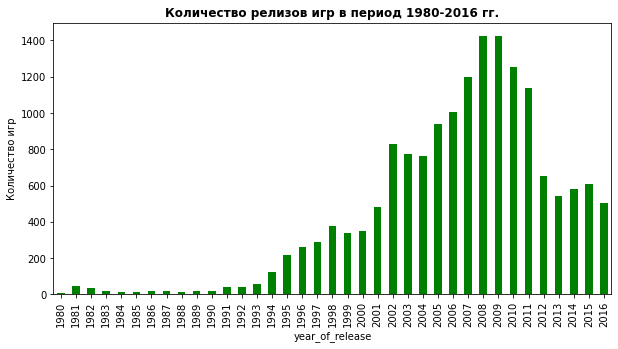

In [44]:
games_count_year.plot(y='counts_of_games', kind='bar', color='g', figsize=(10, 5), legend=False)
plt.ylabel("Количество игр")
plt.title(label='Количество релизов игр в период 1980-2016 гг.', fontsize=12, fontweight="bold")

На графике наблюдаем рост выпущенных игр в период с 1993 по 2009 годы (до этого разработка мало активна), далее идет плавный спад до резкого падения в 2012 году. Необходимый объем данных для нашего анализа стартует с 2011 года.

### Анализ продаж по платформам
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Выявим ТОП-10 платформ с наибольшими суммарными продажами, построим для них гистограммы распределения.

In [45]:
platform_sales_sum = games.pivot_table(index=['platform'], aggfunc={'total_sales':sum}).nlargest(10, columns='total_sales')
platform_sales_sum

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Сформируем новый датафрэйм по нашим 10 лидерам продаж

In [46]:
top_10_platform = games.query('platform in @platform_sales_sum.index')
top_10_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1,-1.0,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01


Нужно все разглядеть на гистограммах, строить 10 по отдельности не будем, пропишем цикл. Для начала создадим списки с нашими временными рамками и названиями платформ

In [47]:
years_list = []
for i in range(1980, 2017):
    years_list.append(i)
years_list

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [48]:
platform_list = top_10_platform['platform'].unique()
platform_list

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'PS',
       'PSP'], dtype=object)

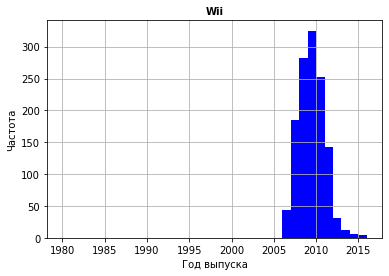

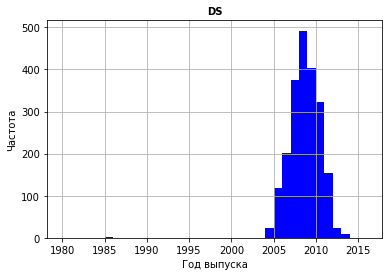

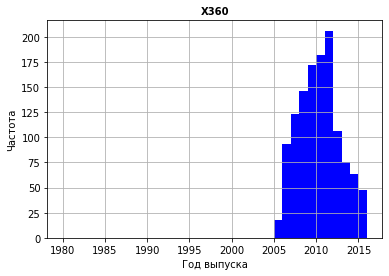

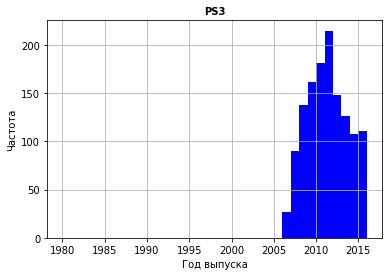

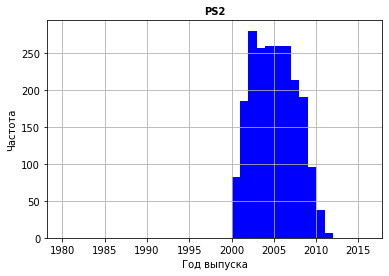

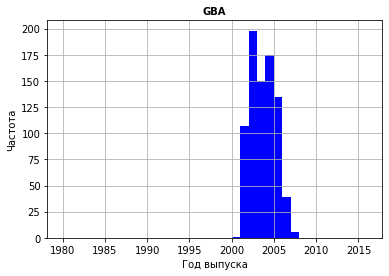

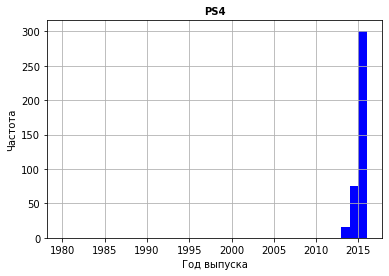

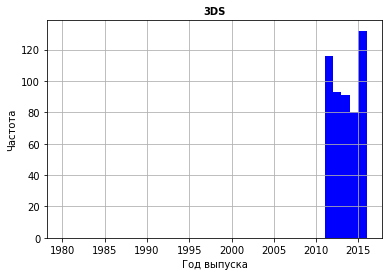

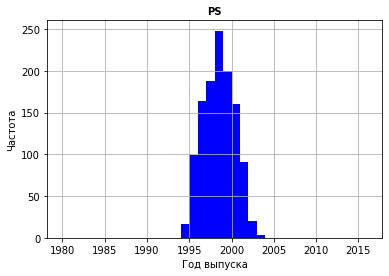

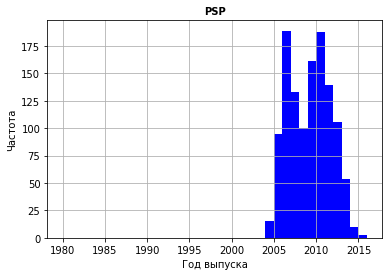

In [49]:
for k in range(0, len(platform_list)):
    top_10_platform[top_10_platform['platform']==platform_list[k]]\
    .plot(kind='hist', bins=years_list, color='b', legend=False, grid=True)
    
    plt.title(label=platform_list[k], fontsize=10, fontweight="bold")
    plt.xlabel("Год выпуска")
    plt.ylabel("Частота")

На графиках очень наглядны поведения платформ за время их существования (взлеты,падения, скачки). 

Например по графику платформы PS4 видно, как резко она набрала популярность среди пользователей. А некоторые платформы, такие как PSP, DS, GBA и др. к настоящему времени прекратили свое существование.

На всех консольных платформах наблюдался резкий скачок продаж в начале и конце существования.

Рассчитаем среднюю продолжительность жизни платформы. Для этого выберем те платформы, которые уже прекратили свое существование(продажи соответственно) *из общего датасета* (посмотрим также на гистограммки). Среднюю будем считать медианой, так как некоторые платформы прожили совсем недолгую (но надеюсь, счастливую) жизнь в 1-2 года.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


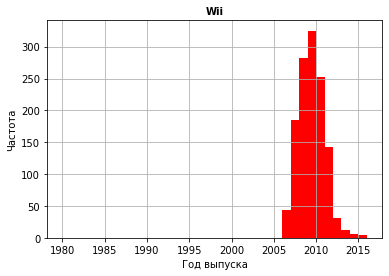

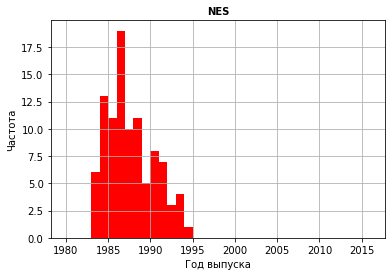

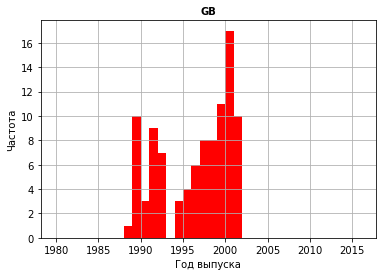

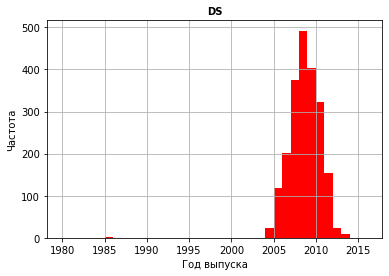

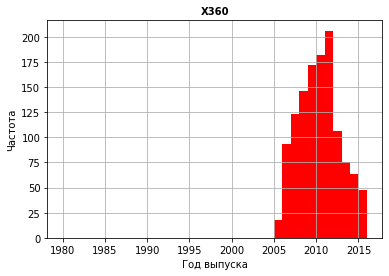

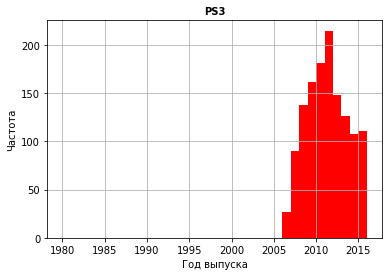

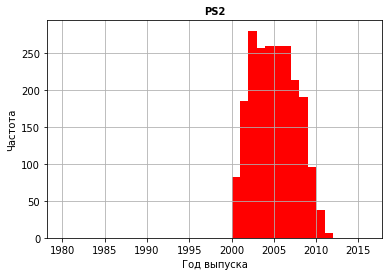

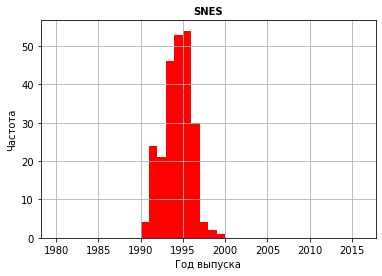

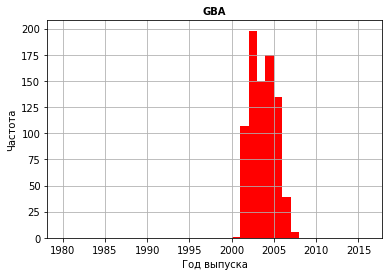

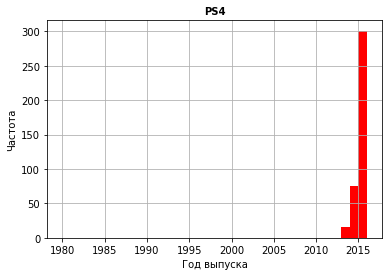

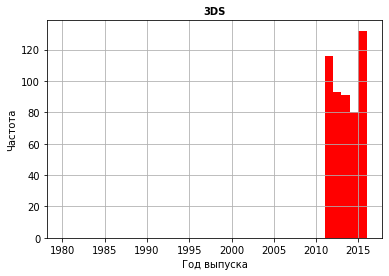

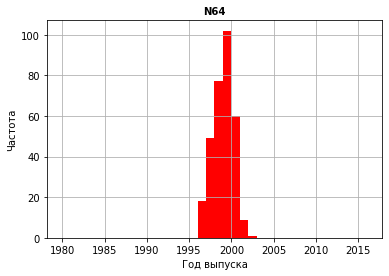

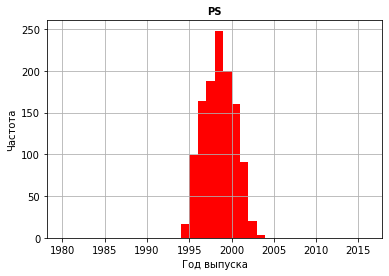

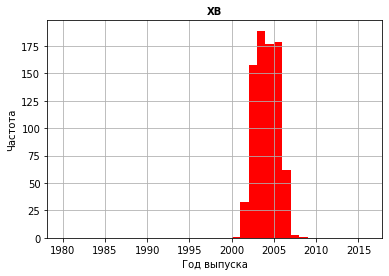

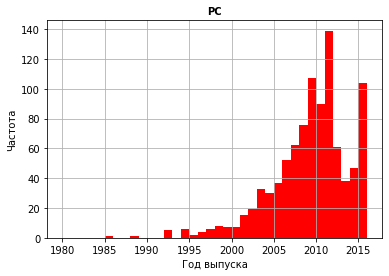

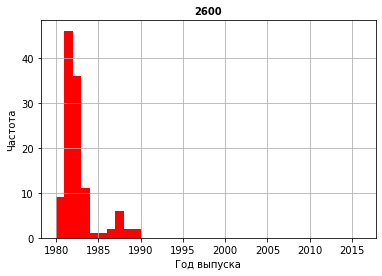

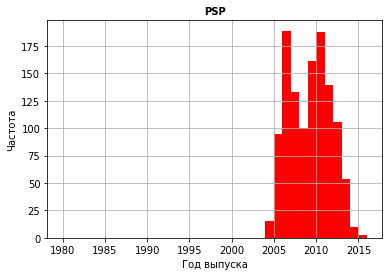

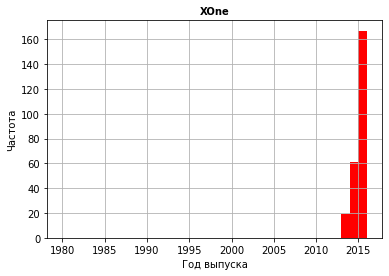

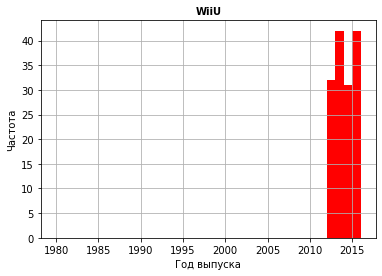

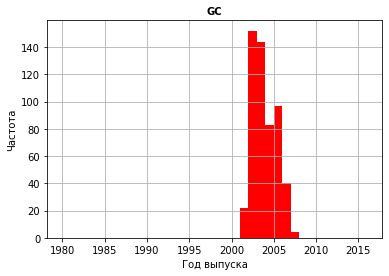

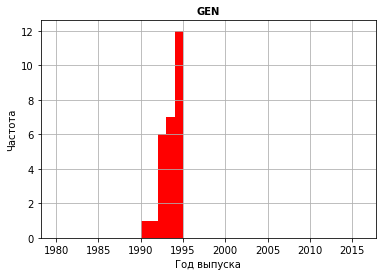

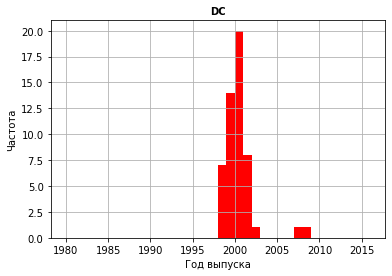

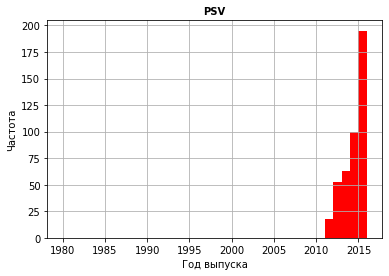

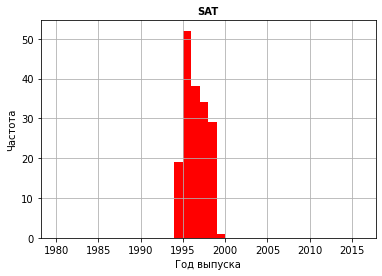

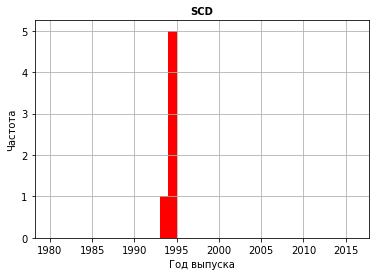

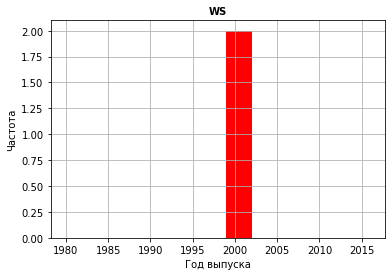

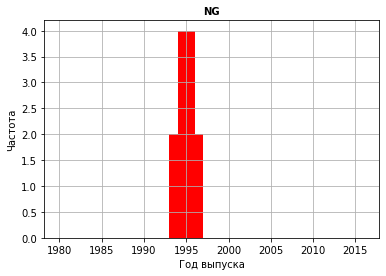

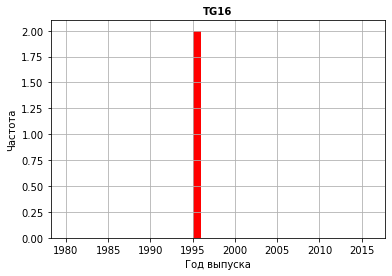

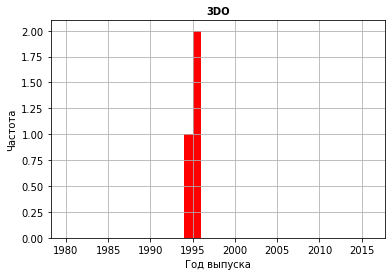

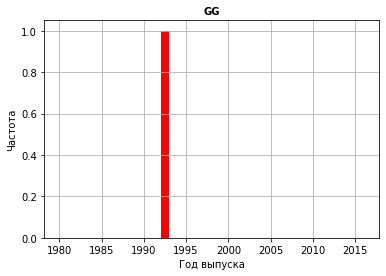

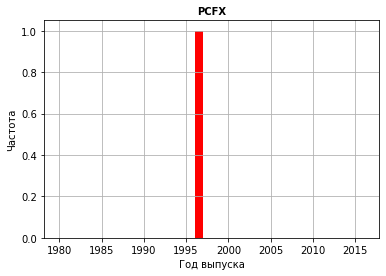

In [50]:
all_platform_list = games['platform'].unique()

for k in range(0, len(all_platform_list)):
    games[games['platform']==all_platform_list[k]]\
    .plot(kind='hist', bins=years_list, color='r', legend=False, grid=True)
    
    plt.title(label=all_platform_list[k], fontsize=10, fontweight="bold")
    plt.xlabel("Год выпуска")
    plt.ylabel("Частота")


На основании графиков составим список, куда войдут те платформы, которые следует исключить из этого анализа. С помощью сводной таблицы вычислим разность между годом окончания существования "умершей" платформы и началом.

In [51]:
platform_not_include = ['WiiU','X360','PS3','PS4', '3DS', 'PC', 'XOne','PSV']

In [52]:
platform_lifetime = games.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])
platform_lifetime.columns = ['begin', 'end']
platform_lifetime['duration'] = platform_lifetime['end'] - platform_lifetime['begin']

Отфильтруемся по platform_not_include

In [53]:
platform_lifetime_filt = platform_lifetime.reset_index().query('platform not in @platform_not_include')
platform_lifetime_filt

,platform,begin,end,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
3,DC,1998,2008,10
4,DS,1985,2013,28
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0
10,N64,1996,2002,6


Ну и возьмем медиану:

In [54]:
mean_lifetime = platform_lifetime_filt['duration'].median()
print('Средняя продолжительность жизни платформы = ', mean_lifetime)

Средняя продолжительность жизни платформы =  7.0


 Таким образом, <b>средний срок продолжительности жизни платформы составляет 7 лет</b>. Так же стоит отметить, что платформа DS является показательным "долгожителем" - просуществовала 28 лет!

Посчитаем через сколько времени в среднем появляется новая платформа, для начала отсортируем сгруппированную по платформам исходную таблицу по столбцу begin по возрастанию

In [55]:
platform_lifetime_appear = platform_lifetime.sort_values(by='begin')
platform_lifetime_appear

,begin,end,duration
platform,,,
2600,1980,1989,9
NES,1983,1994,11
DS,1985,2013,28
PC,1985,2016,31
GB,1988,2001,13
SNES,1990,1999,9
GEN,1990,1994,4
GG,1992,1992,0
SCD,1993,1994,1


Чтобы двигаться по столбцу с началом возникновения платформы, переведем его значения в список. Циклом создадим разность в годах между релизами новых платформ

In [56]:
list_year_begin = list(platform_lifetime_appear['begin'])

In [57]:
list_year_begin_difference = []
for k in range(0, len(list_year_begin)-1):
    difference = list_year_begin[k+1] - list_year_begin[k]
    list_year_begin_difference.append(difference)

Добавим полученные значения к platform_lifetime_appear, для этого в конец списка "прицепим" NaN, а затем удалим строку с этим пропуском и посчитаем средний срок появления

In [58]:
list_year_begin_difference.append(np.nan)
platform_lifetime_appear['difference'] = list_year_begin_difference

platform_lifetime_appear

,begin,end,duration,difference
platform,,,,
2600,1980,1989,9,3.0
NES,1983,1994,11,2.0
DS,1985,2013,28,0.0
PC,1985,2016,31,3.0
GB,1988,2001,13,2.0
SNES,1990,1999,9,0.0
GEN,1990,1994,4,2.0
GG,1992,1992,0,1.0
SCD,1993,1994,1,0.0


In [59]:
platform_lifetime_appear = platform_lifetime_appear.dropna()
platform_lifetime_appear

,begin,end,duration,difference
platform,,,,
2600,1980,1989,9,3.0
NES,1983,1994,11,2.0
DS,1985,2013,28,0.0
PC,1985,2016,31,3.0
GB,1988,2001,13,2.0
SNES,1990,1999,9,0.0
GEN,1990,1994,4,2.0
GG,1992,1992,0,1.0
SCD,1993,1994,1,0.0


In [60]:
mean_appear_time = platform_lifetime_appear['difference'].median()
print('Средний срок появления новых платформ = ', mean_appear_time)

Средний срок появления новых платформ =  1.0


 Таким образом, <b>среднее время появления новой платформы составляет 1 год</b>

### Потенциально прибыльные платформы
Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не будем учитывать в работе данные за предыдущие годы.
Ответим на вопрос ,какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

При проведении текущего анализа возьмем данные за последние несколько лет (актуальный периодом примем 2012 - 2016 гк), на их основании достовернее делать прогнозы. Сделаем срез данных по этому периоду.

In [66]:
last_years = []
for k in range(2012, 2017):
    last_years.append(k)
games_last = games.query('year_of_release in @last_years')
games_last

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


Вычислим лидеров продаж чреди платформ за последние годы

In [67]:
rel_platform_sales_sum = games_last.pivot_table(index='platform', values='total_sales', aggfunc=sum).sort_values(by='total_sales', ascending=False)
rel_platform_sales_sum                        

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [68]:
#print ('Количество платформ в период 1980-2016 гг:', len(games['platform'].unique()))
print(f"Количество платформ в период 1980-2016 гг: {len(games['platform'].unique())}")

Количество платформ в период 1980-2016 гг: 31


In [69]:
#print('Количество платформ в период 2012-2016 гг:', len(games_last['platform'].unique()))
print(f"Количество платформ в период 2012-2016 гг:: {len(games_last['platform'].unique())}")

Количество платформ в период 2012-2016 гг:: 11


В выбранном нами периоде из 31 платформы осталось 11. Посмотрим на графиках, вероятно, из 11 платформ какая-то уже прекратила существовать

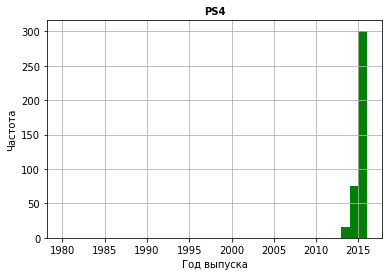

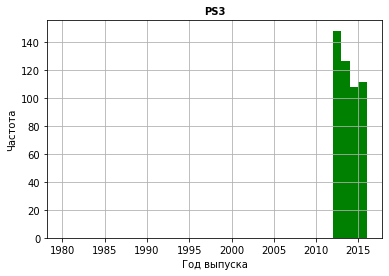

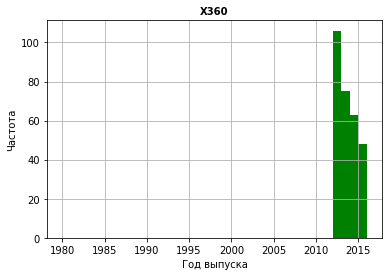

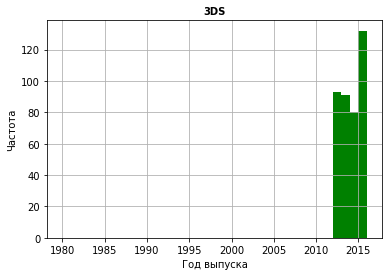

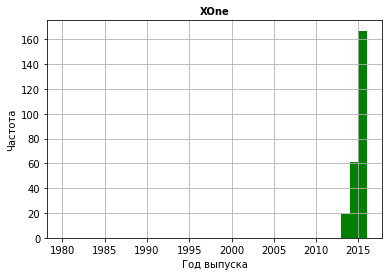

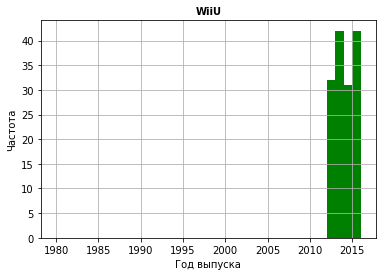

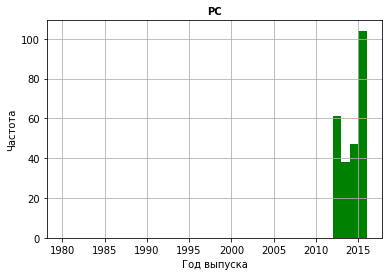

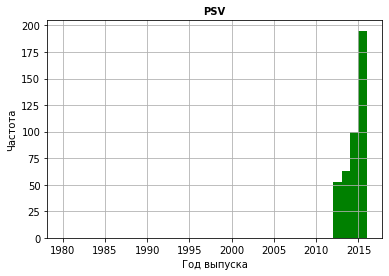

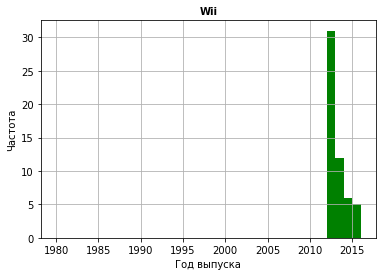

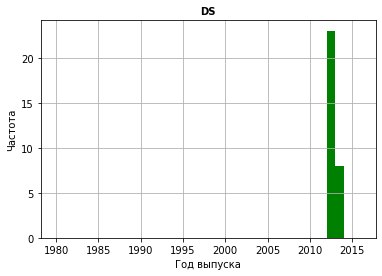

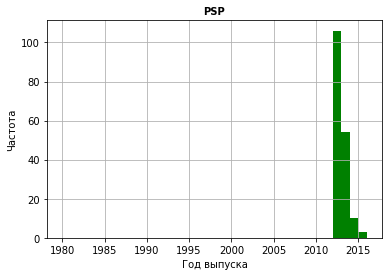

In [70]:
for k in range(0, len(rel_platform_sales_sum.index)):
    games_last[games_last['platform']==rel_platform_sales_sum.index[k]]\
    .plot(kind='hist', bins=years_list, legend=False, color= 'g', title=rel_platform_sales_sum.index[k], grid=True)
    
    plt.title(label=rel_platform_sales_sum.index[k], fontsize=10, fontweight="bold")
    plt.xlabel("Год выпуска")
    plt.ylabel("Частота")

 Действительно, платформа DS прекратила существовать, а продажи PSP стремятся к нулю. Из списка потенциально прибыльных платформ их исключаем и имеем следующий список <b>9 потенциально прибыльных платформ:PS4, PS3, X360, 3DS, XOne,	WiiU, PC, PSV, Wii </b>

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам


Для удобного анализа построим диаграммы размаха сразу на одном графике (это не только наглядно, но еще и очень красиво)

Text(0.5, 1.0, 'Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

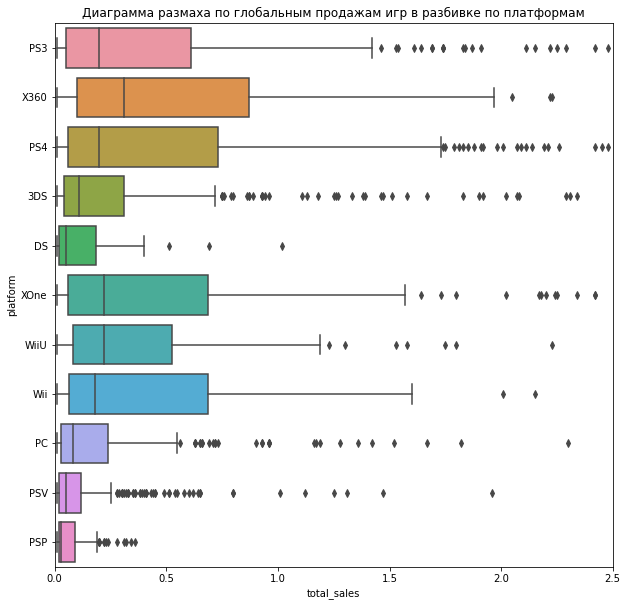

In [71]:
plt.figure(figsize=(10,10))
sns.boxplot(data=games_last, x='total_sales', y='platform')
plt.xlim(0, 2.5)
plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам')

 По данным диаграммам легко определить была ли популярна платформа в интересующий нас отрезок времени. Определить можно по объему продаж, который входит в межквартильный размах, и медианному значению. Чем они выше, тем популярнее платформа. К примеру, X360 или PS4 однозначно популярны.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Опять же берем несколько популярных и потенциально прибыльных платформ и посмотрим, насколько продажи на этих платформах зависят от оценок игр. Для наглядности и удобства анализа пропишем цикл построения диаграмм рассеяния, расположив зависимость от оценок критиков и пользователей слева и справа соответственно

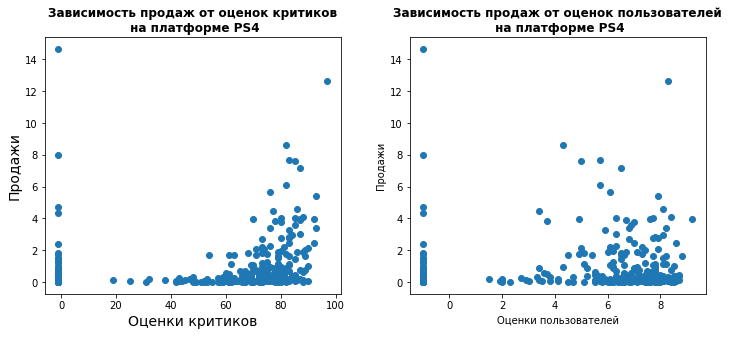

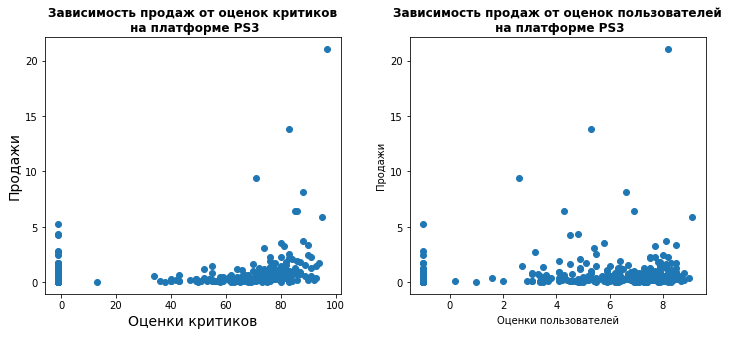

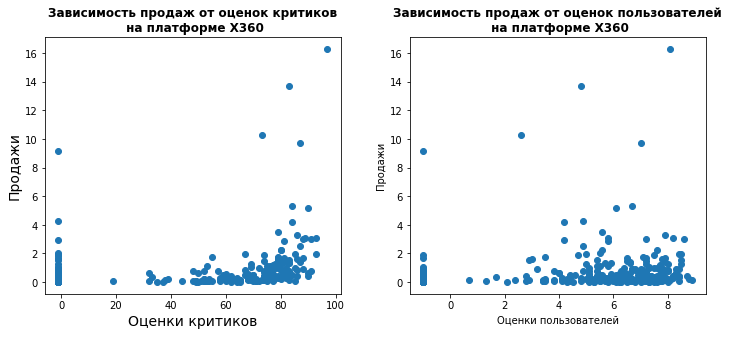

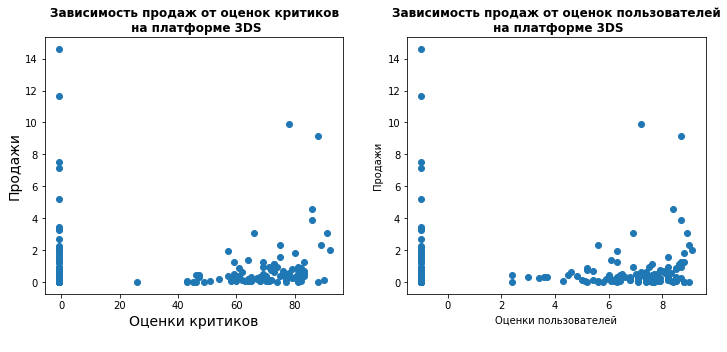

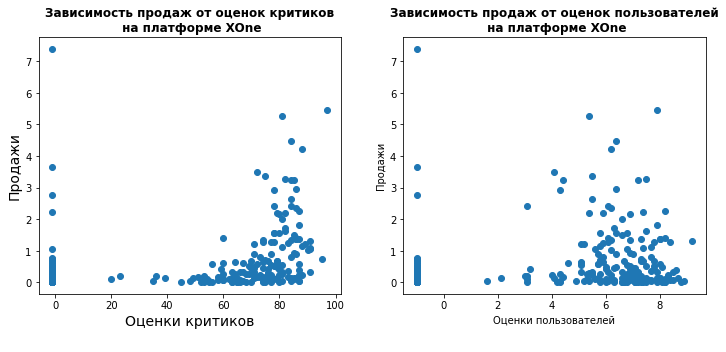

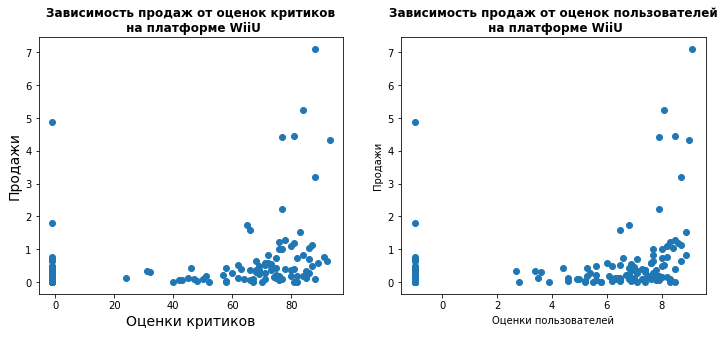

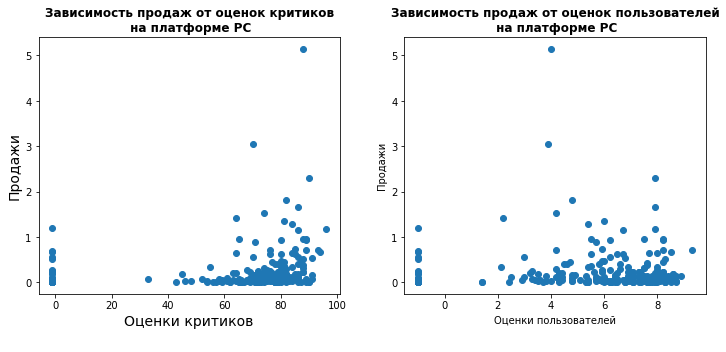

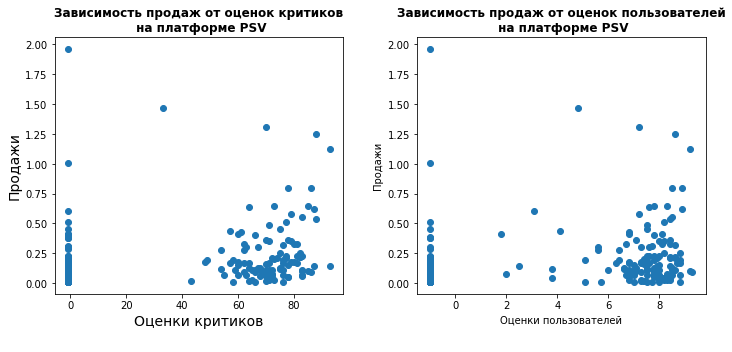

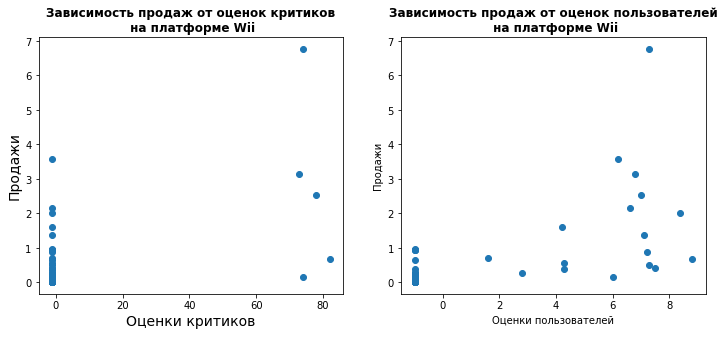

In [80]:
relevant_platforms = ['PS4','PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii']

for name_platform in relevant_platforms:
    x_user = games_last[games_last['platform']==name_platform]['user_score']
    y_user = games_last[games_last['platform']==name_platform]['total_sales']
    x_critic = games_last[games_last['platform']==name_platform]['critic_score']
    y_critic = games_last[games_last['platform']==name_platform]['total_sales']
    
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121)
    
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+name_platform, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=14)
    ax1.set_ylabel('Продажи', fontsize=14)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+name_platform, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n')
    ax2.set_ylabel('Продажи')
    
    plt.tight_layout(w_pad=3)
    
    
    

 На диаграммах рассеяния замечаем, что:
    
 - при **оценке критиков от ~60 баллов объем продаж** довольно резко **возрастает** (до 60 баллов продажи малы). 
 - при оценке пользователей от 2-4 баллов продажи начинают расти, сама зависимость менее выражена
    
Критики влиятельнее =)

Расчитаем коэффициент корреляции

In [87]:
for name_platform in relevant_platforms:
    print('Коэффициент корреляции продаж и оценок критиков', name_platform)    
    print(games_last[games_last['platform']==name_platform]['total_sales'].corr(games_last[(games_last['platform']==name_platform)&(games_last['critic_score']>= 0)]['critic_score']))

Коэффициент корреляции продаж и оценок критиков PS4
0.406567902061781
Коэффициент корреляции продаж и оценок критиков PS3
0.3314972592629587
Коэффициент корреляции продаж и оценок критиков X360
0.36057348885073365
Коэффициент корреляции продаж и оценок критиков 3DS
0.32080286953607845
Коэффициент корреляции продаж и оценок критиков XOne
0.41699832800840175
Коэффициент корреляции продаж и оценок критиков WiiU
0.3483797601201749
Коэффициент корреляции продаж и оценок критиков PC
0.23724324311567918
Коэффициент корреляции продаж и оценок критиков PSV
0.09448789929316172
Коэффициент корреляции продаж и оценок критиков Wii
-0.4243413011077495


In [88]:
for name_platform in relevant_platforms:
    print('Коэффициент корреляции продаж и оценок пользователей', name_platform)
    print(games_last[games_last['platform']==name_platform]['total_sales'].corr(games_last[(games_last['platform']==name_platform)&(games_last['user_score']>= 0)]['user_score']))

Коэффициент корреляции продаж и оценок пользователей PS4
-0.031957110204556424
Коэффициент корреляции продаж и оценок пользователей PS3
-0.005143522887113816
Коэффициент корреляции продаж и оценок пользователей X360
0.0061639786462133256
Коэффициент корреляции продаж и оценок пользователей 3DS
0.19758263411038596
Коэффициент корреляции продаж и оценок пользователей XOne
-0.06892505328279412
Коэффициент корреляции продаж и оценок пользователей WiiU
0.4002190202148617
Коэффициент корреляции продаж и оценок пользователей PC
-0.12186747630735577
Коэффициент корреляции продаж и оценок пользователей PSV
-0.004339437514314869
Коэффициент корреляции продаж и оценок пользователей Wii
0.2961968000747953


 Исходя из значений коэффициетов корреляций видим слабую прямую или в некоторых случаях практически отсутствующую связь продаж от оценок обеих групп (исключение платформа Wii). А также зависимость оценок пользователей на объемы продаж в целом гораздо ниже оценок критиков (здесь исключения, опять же, Wii и PSV, где коэффициенты корреляции примерно равны)
    
    
**УПД.:**
    У оценок критиков и продаж линейная прямая связь, действительно, прослеживается ярче. Исключение опять же составила платформа Wii (здесь связь обратная, хоть и слабоватая), здесь поклонники Нинтендо опять-таки идут вразрез со всеми остальными и гораздо больше ориентируются на оценки самих пользователей. 

### Общее распределение игр по жанрам
Ответим на вопросы:

- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

Посмотрим, насколько распределились жанры в количественном и денежном исполнениях:

Text(0.5, 1.0, 'Количество игр по жанрам')

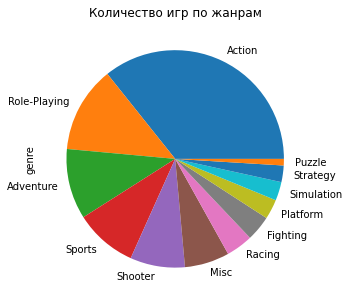

In [92]:
games_last['genre'].value_counts().plot(kind='pie', figsize=(5, 5), legend=False)
plt.title(label='Количество игр по жанрам')

Text(0.5, 1.0, 'Количество продаж по жанрам')

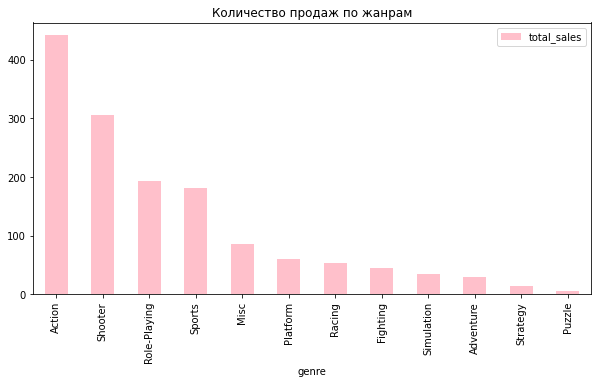

In [95]:
games_last.pivot_table(index='genre', aggfunc={'total_sales':sum}).sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', color = 'pink',  figsize=(10, 5))
plt.title(label='Количество продаж по жанрам')

 Экшн занимает подавляющую долю из всего многообразия жанров <b>по количеству</b>. Вероятно, этот жанр присваивается чаще остальных играм, не выделяя отдельно шутеры, или иные динамичные игры. На втором месте по количеству стоят ролевые игры (хотя по продажам их обогнали более дорогие шутеры). Дешево и популярно играть в приключения.
Далее Аутсайдером является паззл, явно игрушка не для всех (хотя в последнее время довольно часто предлагается рекламой). 

Text(0.5, 1.0, 'Cредняя цены игры в жанре')

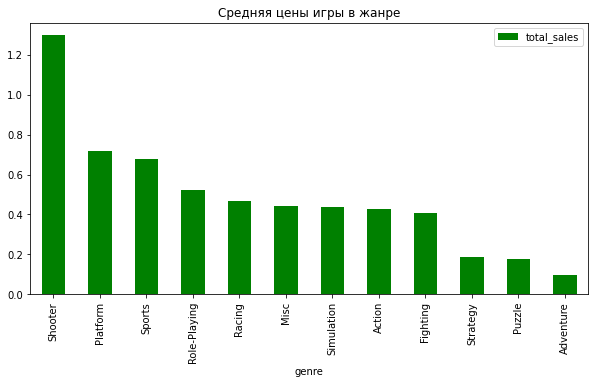

In [98]:
games_last.pivot_table(index='genre', aggfunc={'total_sales':np.mean}).sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', color = 'g',  figsize=(10, 5))
plt.title(label='Cредняя цены игры в жанре')

 При рассмотрении <b>средней цены игры в разрезе жанра</b> видим, что самой дорогой является шутер (действительно, разработка подобных игр занимает большое количество ресурсов), второе-третье место приблизительно делят спортивные и платформенные игры, далее уверенные "середнячки" ролевые, гонки, симуляции и наш лидер по количеству экшн. Наименее дорогостоящие - игры на логику и для детей (там и визуализация, как правило, слабее, соотвественно, разработка не дорогая)

## Портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)
Опишем различия в долях продаж.

Рассчитаем суммарные продажи каждого из регионов по платформам, определив тем самым ТОП-5 из них. Построим графики продаж для самых популярных

In [72]:
region_top5_platforms = games_last.pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
region_top5_platforms    

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


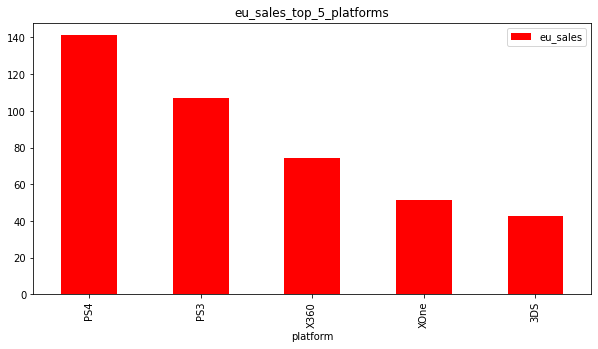

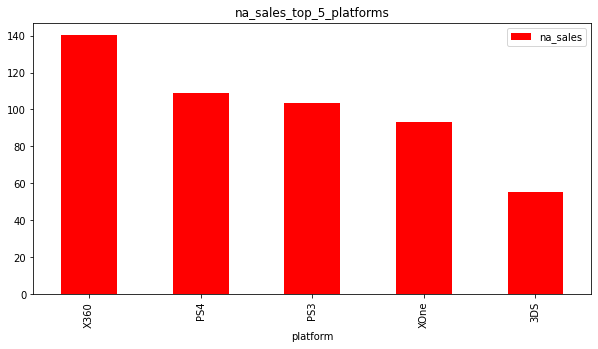

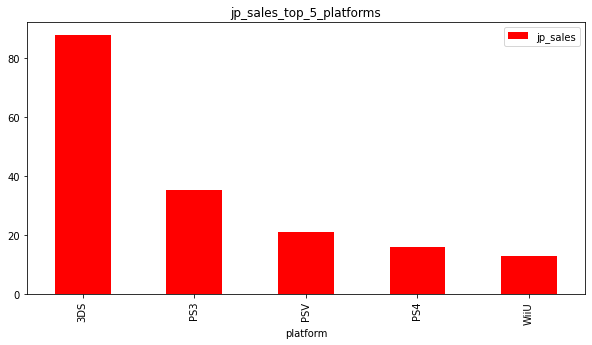

In [73]:
region = ['eu_sales', 'na_sales', 'jp_sales']

for k in range(0, 3):
    region_top5_platforms.nlargest(5, columns=region[k]).plot(y=region[k], kind='bar', figsize=(10, 5), color='r', title=region[k]+'_top_5_platforms')

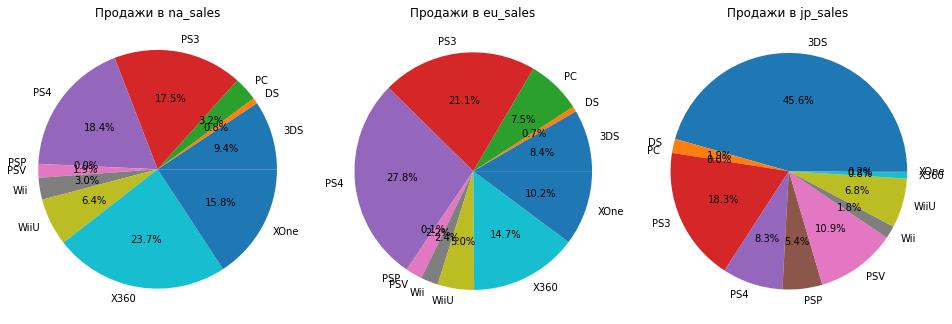

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']

for i in [0,1,2]:
    labels = region_top5_platforms[region[i]].index
    sizes = region_top5_platforms[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%') 
    ax.axis('equal')  

 <b>Самые популярные платформы:</b>
    
    Европа - PS4  (27.8% продаж от рынка. В Америке уверенное второе место - 18,4%, в Японии / 8,4%)
    Америка - X360(23,7%, в Европе - 14,7%, в Японии - 0,8% - американские платформы здесь почти не продаются)
    Япония - 3DS (45,6%, в Америке - 9,4%, в Европе - 8,4% - и наоборот)
    
 Видим, что Япония и Америка поддерживают отечественного производителя (нинтендо и икс-бокс соответственно), Европа такой поддержкой не обладает 

### Самые популярные жанры (топ-5).


Аналогично поступим с анализом ТОП-5 жанров.

In [75]:
region_top5_genres = games_last.pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
region_top5_genres   

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


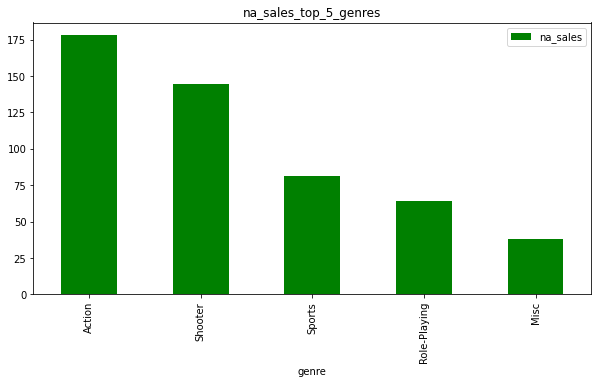

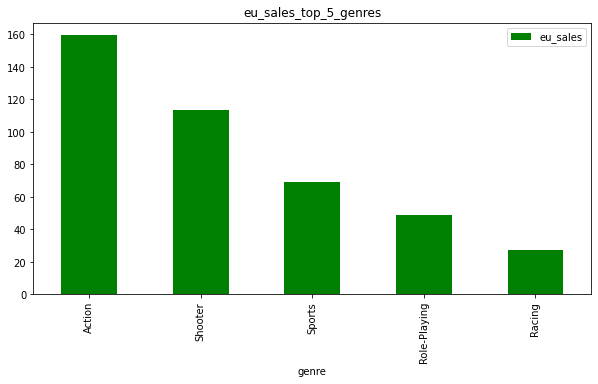

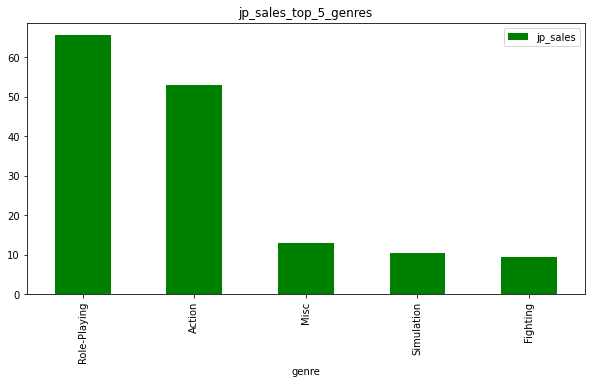

In [76]:
for k in range(0, 3):
    region_top5_genres .nlargest(5, columns=region[k]).plot(y=region[k], kind='bar', figsize=(10, 5), color='g', title=region[k]+'_top_5_genres')

 <b>Самые популярные жанры в порядке убывания:</b>
    
    Европа - action, shooter, sports, role-playing, racing
    Америка - action, shooter, sports, role-playing, misc
    Япония - role-playing, action, misc, simulation, fighting
    
 Пользователи Европы и Северной Америки практически идентичны, за исключением последнего жанра: в Европе это гонки (любовь к отечественным спорткарам явно накладывает свой отпечаток), а в Северной Америке - аркады. 
 Картина по пользователям Японии интереснее, они предпочитают в основной массе ролевые игры, но также солидарны с европейцами и американцами в пристрастии к экшену -эти жанры лидеры в продажах с большим и резким отрывом от остальных (в стране восточных единоборств в топ-5 жанров вошел и файтинг).

### Влияние рейтинга ESRB на продажи в отдельном регионе
Рейтинг от организации ESRB (англ. Entertainment Software Rating Board)- рейтинг компьютерных игр с присвоением им подходящей возрастной категории

Анализируем по отработанной схеме

In [77]:
rating_esrb = games_last.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
rating_esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
unknown,91.50,108.84,103.31


**«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

**«E10+» («Everyone 10 and older»)** — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены.

**«M» («Mature»)** — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.  

**«T» («Teen»)** — «Подросткам 13—19 лет» : Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 

**«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Поскольку у нас оставлены неопределенные позиции **unknown** по рейтингу, и, исходя из предположения, что из рейтингов от организации ESRB невостребованным оказался только он, можем думать, что все неизвестные  - это категория "Только для всрослых" 

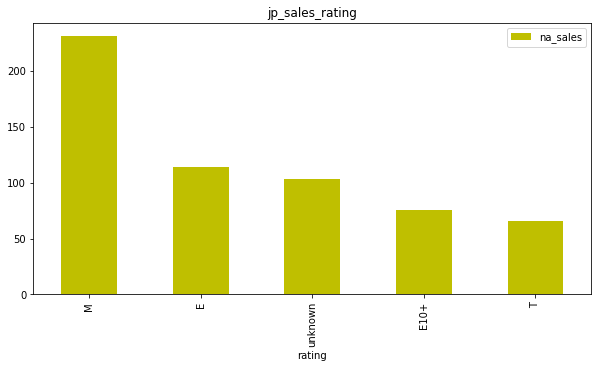

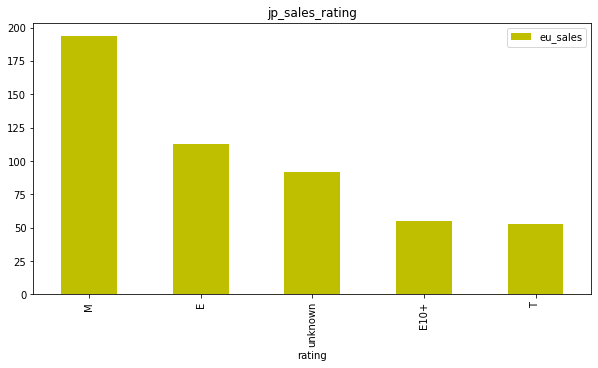

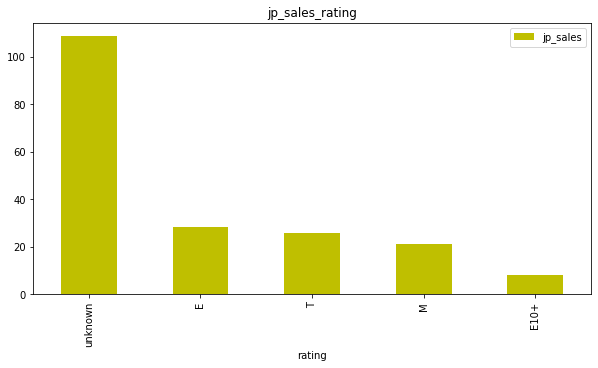

In [78]:
for k in range(0, 3):
    rating_esrb.sort_values(by=region[k], ascending=False).plot(y=region[k], kind='bar',color='y',  figsize=(10, 5), title=region[i]+'_rating')

 Таким образом, в Америке и Европе практически идентичное распределение продаж в зависимости от рейтингов: преобладают, с большим отрывом, игры от 17 лет, далее игры для всех, на третьем месте игры с неизвестным (предположительно только для взрослых) рейтингом, далее для всех, кто старше 10 лет и замыкают игры для подростков 13-19 лет (наименее, как мне кажется, распространенная категория).
В Японии все опять не так: лидируют игры с неизвестным (предположительно только для взрослых) рейтингом с большим отрывом, кстати, здесь это предположение только подтверждается, зная о специфичных пристрастиях жителей страны восходящего солнца =) менее всего популярны игры для всех, кто старше десяти лет.

<b> 
    Наблюдаем, что поведение американцев и европейцев в целом схоже в выборе платформ, жанров и возрастного рейтинга игр, то есть портреты этих пользователей практически идентичны за редкими особенностями.
    Жители Японии разительно отличаются в предпочтениях от западных пользователей. Очень большая разница в культурах, менталитете и в целом обособленности страны. Соответственно так прозрачно прослеживаются различия в предпочтениях.

## Проверка гипотез
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Гипотеза №1

Первая гипотеза, которую нужно проверить - **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

Сформулируем нулевую и альтернативную гипотезы:

***H0*** - средние пользовательские рейтинги платформ Xbox One и PC равны (в H0 всегда используется знак равенства);

***H1*** - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC .

Альтернативная гипотеза у нас двусторонняя, поскольку средний рейтинг может отличаться как в большую так и в меньшую сторону.

Чтобы проверить гипотезу о равенстве средних двух выборок, применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать).

Удалим из выборки отрицательные значения, которыми ранее заменили пропуски, чтобы они не влияли на распределения. Затем посмотрим дисперсии рассматриваемых выборок

In [79]:
xbox_ttest = games_last[(games_last['platform']=='XOne')&(games_last['user_score'] >= 0)]['user_score']
pc_ttest = games_last[(games_last['platform']=='PC')&(games_last['user_score'] >= 0)]['user_score']

In [80]:
xbox_ttest_var = np.var(xbox_ttest, ddof=1)
pc_ttest_var = np.var(pc_ttest, ddof=1)
print('Дисперсия платформы Xbox One равна', round(xbox_ttest_var, 3))
print('Дисперсия платформы PC равна', round(pc_ttest_var, 3))
print('Разница между дисперсиями выборок составляет', round(abs(xbox_ttest_var-pc_ttest_var), 3))

Дисперсия платформы Xbox One равна 1.907
Дисперсия платформы PC равна 2.77
Разница между дисперсиями выборок составляет 0.863


При нашем данном уровне дисперсий имеем довольно большую разность, то есть считать дисперсии выборок равными нельзя. Задаем аргумент equal_var=False, уровень значимости alpha = 5%

In [81]:
alpha = 0.05
results = st.ttest_ind(xbox_ttest, pc_ttest, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


р-значение значимости равно ~ 55%, что в 11 раз больше заданного уровня значимости, соответственно нулевая гипотеза живее всех живых, <b>средний рейтинг платформ Xbox One и PC статистически значимо не отличается

### Гипотеза №2

Вторая гипотеза для проверки: **"средние пользовательские рейтинги жанров Action и Sports разные".**

Сформулируем нулевую и альтернативную гипотезы:

***H0*** - средние пользовательские рейтинги жанров Action и Sports равны (в H0 всегда используется знак равенства);

***H1*** - средние пользовательские рейтинги жанров Action и Sports различны.

Действуем аналогично проверке первой гипотезы

In [82]:
action_ttest = games_last[(games_last['genre']=='Action')&(games_last['user_score'] >= 0)]['user_score']
sports_ttest = games_last[(games_last['genre']=='Sports')&(games_last['user_score'] >= 0)]['user_score']

In [83]:
action_ttest_var = np.var(action_ttest, ddof=1)
sports_ttest_var = np.var(sports_ttest, ddof=1)
print('Дисперсия жанра Action равна', round(action_ttest_var, 3))
print('Дисперсия жанра Sports равна', round(sports_ttest_var, 3))
print('Разница между дисперсиями выборок составляет', round(abs(action_ttest_var-sports_ttest_var), 3))

Дисперсия жанра Action равна 1.889
Дисперсия жанра Sports равна 3.023
Разница между дисперсиями выборок составляет 1.134


При нашем данном уровне дисперсий имеем довольно большую разность, то есть считать дисперсии выборок равными нельзя. Задаем аргумент equal_var=False, уровень значимости alpha = 5%

In [84]:
alpha = 0.05
results = st.ttest_ind(action_ttest, sports_ttest, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


р-значение значимости стремится к нулю, горздо меньше заданного уровня значимости в 5%, соответственно нулевая гипотеза отвергнута, <b>средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются

# Общие выводы

Подводя итоги анализа данных о продажах видеоигр на мировом рынке можно заключить:

1. В первую очередь следует обратить внимание на **потенциально прибыльные игровые платформы** такие, как **'PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii'**. 
2. **Продажи** по платформам **'PS3', 'X360', 'Wii' падают**, но все еще могут принести некоторую прибыль. 
3. Нужно иметь ввиду что **в разных регионах популярные платформы могут отличаться**, например платформа 3DS очень популярна в Японии, но менее популярна в Европе и Америке. Платформы **3DS, PS3, PS4 популярны во всех регионах**.
4. Среди жанров видеоигр также можно выделить наиболее **популярные и перспективные**, например **жанр Action** перспективный во всех регионах, а также жанры **Shooter, Sports и Role-Playing** являются **потенциально прибыльными** и следует учесть это при планировании. 
5. Следует быть аккуратными с таким **жанром как Adventure**. Несмотря на то, что игры с таким жанром занимают серьезную долю рынка в количественном отношении, их **продажи** очень **невысоки**.
6. Многие игры из исходного датасета **не имеют рейтинга ESRB**, поэтому данные анализа здесь не совсем полные и корректные. Мы сделали предположение, что это рейтинг категории **«AO» («Adults Only 18+»)** — «Только для взрослых» (из рейтингов от организации ESRB невостребованным оказался только он). В целом можно сказать,  **в Америке и Европе** практически идентичное распределение продаж в зависимости от рейтингов: **преобладают**, с большим отрывом, **игры от 17 лет**, далее **игры для всех**, на третьем месте игры с неизвестным (предположительно только для взрослых) рейтингом, далее для всех, кто старше 10 лет и замыкают игры для подростков 13-19 лет (наименее, как мне кажется, распространенная категория). **В Японии лидируют игры с неизвестным (предположительно только для взрослых)** рейтингом с большим отрывом, кстати, здесь это предположение только подтверждается, зная о специфичных пристрастиях жителей страны восходящего солнца =) менее всего популярны игры для всех, кто старше десяти лет.
7. Влияние на продажи игр оказывают их оценки. Оценки делятся на оценки критиков и пользователей. Выявлено, что **оценки критиков имеют в два раза более тесную связь с продажами, чем оценки пользователей**. Поэтому стоит учитывать только оценки критиков (исключение составляют японские платформы от Нинтендо, здесь пользователи больше ориентируются на оценки от соратников). При этом была выявлена закономерность: **продажи** видеоигр начинают **активно расти при оценке критиков от 60 баллов и выше**.
8. В целом пользователи из регионов Европа и Северная Америка очень схожи в своих предпочтених и можно объеденить усилия и рекламный контент для этих направлений. Но необходимо **более вниамтельно разработать кампанию продаж в Японии**.

*Рекомендую сосредоточить все силы на Европе и Северной Америке. Но если ресурсы позволят, то было бы здорово подключить и Азию*